

##Overview
Existing SNP calling pipelines often come with built-in filtering processes, which can introduce systematic bias. Each method has its own algorithm to identify and define SNPs, it can lead to moderate to large variations in final outputs. A simple, intuitive and consistent bioinformatics workflow is thus needed for developing new analytical methods.

Here we present **snpGBS**, a simple three-step approach to identify SNPs from GBS data:

##Setting up the environment




In [1]:
%%bash
which python # should return /usr/local/bin/python
python --version
echo $PYTHONPATH
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


/usr/local/bin/python
Python 3.7.10
/env/python
PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml

--2021-07-02 12:41:29--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-07-02 12:41:29--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.91M 11s
    50K .......... .......... .......... .......... ..........  0

In [2]:
import sys
sys.path
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

Check the conda and python installation.

In [3]:
!which conda # should return /usr/local/bin/conda
!conda --version # should return 4.5.4
!which python # returns /usr/local/bin/python
!python --version # now returns Python 3.6.5 :: Anaconda, Inc.

/usr/local/bin/conda
conda 4.5.4
/usr/local/bin/python
Python 3.6.5 :: Anaconda, Inc.


###Install cutadapt

In [4]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes
python3 -m pip install --upgrade pip
python3 -m pip install cutadapt


Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    readline-8.1               |       h27cfd23_0         464 KB
    urllib3-1.26.6             |     pyhd3eb1b0_1         106 KB
    ruamel_yaml-0.15.100       |   py36h27cfd23_0         268 KB
    _libgcc_mutex-0.1          |             main           3 KB
    tqdm-4.61.1                |     pyhd3eb1b0_1          78 KB
    ld_impl_linux-64-2.35.1    |       h7274673_9         637 KB
    idna-2.10                  |     pyhd3eb1b0_0          52 KB
    chardet-4.0.0              |py36h06a4308_1003         213 KB
    certifi-2021.5.30          |   py36h06a4308_0         141 KB
    cffi-1.14.5                |   py36h261ae71_0         224 KB
    wheel-0.36.2               |     pyhd3eb1b0_0   

readline-8.1         |  464 KB | ########## | 100% 
urllib3-1.26.6       |  106 KB | ########## | 100% 
ruamel_yaml-0.15.100 |  268 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
tqdm-4.61.1          |   78 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  637 KB | ########## | 100% 
idna-2.10            |   52 KB | ########## | 100% 
chardet-4.0.0        |  213 KB | ########## | 100% 
certifi-2021.5.30    |  141 KB | ########## | 100% 
cffi-1.14.5          |  224 KB | ########## | 100% 
wheel-0.36.2         |   31 KB | ########## | 100% 
ncurses-6.2          |  1.1 MB | ########## | 100% 
pip-21.1.3           |  2.1 MB | ########## | 100% 
conda-4.10.3         |  3.1 MB | ########## | 100% 
setuptools-52.0.0    |  933 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
conda-package-handli |  946 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
sqlite-3.36.

## Install bowtie2

In [5]:
!conda install -c bioconda bowtie2 --yes

Solving environment: | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bowtie2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bowtie2-2.3.5.1            |   py36he513fc3_0        12.0 MB  bioconda
    perl-5.26.2                |       h14c3975_0        10.5 MB
    tbb-2021.2.0               |       hff7bd54_0         187 KB
    ------------------------------------------------------------
                                           Total:        22.6 MB

The following NEW packages will be INSTALLED:

  bowtie2            bioconda/linux-64::bowtie2-2.3.5.1-py36he513fc3_0
  perl               pkgs/main/linux-64::perl-5.26.2-h14c3975_0
  tbb                pkgs/main/linux-64::tbb-2021.2.0-hff7bd54_0



perl-5.26.2          | 10.5 MB   | : 100% 1.0/1 [00:00<00:00,  1.16it/s]
tbb-2021.2.0         | 187 KB    | : 100% 1.0/1 [00:0

##Install samtools & bcftools

In [6]:
!conda install -c bioconda bcftools --yes
!conda install -c bioconda samtools --yes

Solving environment: - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bcftools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bcftools-1.9               |       ha228f0b_4         807 KB  bioconda
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    curl-7.71.1                |       hbc83047_1         140 KB
    krb5-1.18.2                |       h173b8e3_0         1.3 MB
    libcurl-7.71.1             |       h20c2e04_1         305 KB
    libdeflate-1.0             |       h14c3975_1          43 KB  bioconda
    libedit-3.1.20210216       |       h27cfd23_1         167 KB
    libssh2-1.9.0              |       h1ba5d50_1         269 KB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW pa

##Example
To help users with testing snpGBS, we put together an example with the following files

Raw GBS data: example.fastq generated by SimGBS (can be downloaded from https://figshare.com/articles/dataset/snpGBS/13591274)

Barcode sequences: barcodes.txt and barcodes.fasta are stored in https://github.com/AgResearch/snpGBS/tree/main/example/datasets

Reference Genome: ref.fa can also be found in https://figshare.com/articles/dataset/snpGBS/13591274



**Run the cell below to download example files.**

In [7]:
!wget https://raw.githubusercontent.com/AgResearch/snpGBS/main/example/datasets/barcodes.fasta
!wget -O ref.fa https://ndownloader.figshare.com/files/26074529 #Reference Genome: ref.fa 
!wget -O example.fastq https://ndownloader.figshare.com/files/26074523 #Raw GBS data: example.fastq generated by SimGBS

--2021-07-02 12:43:51--  https://raw.githubusercontent.com/AgResearch/snpGBS/main/example/datasets/barcodes.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [text/plain]
Saving to: ‘barcodes.fasta’

barcodes.fasta      100%[===================>]   1.96K  --.-KB/s    in 0s      

2021-07-02 12:43:51 (39.3 MB/s) - ‘barcodes.fasta’ saved [2010/2010]

--2021-07-02 12:43:51--  https://ndownloader.figshare.com/files/26074529
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.16.102.173, 54.217.124.219, 2a05:d018:1f4:d000:b283:27aa:b939:8ed4, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.16.102.173|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaw

##Step One: Demultiplexing
We use cutadapt to demultiplex the raw GBS data (i.e. .fastq or .fastq.gz file). More information about cutadapt: https://cutadapt.readthedocs.io/en/stable/guide.html#demultiplexing

In [8]:
%%bash
## 1.1 trimming common adapter
cutadapt -j 8 -a common_adapter=AGATCGGAAGAGCGGTTCAGCAGGAATGCCGAG -o example.trimmed.fastq example.fastq >01.trimmed.stdout 2>01.trimmed.stderr

## 1.2 demultiplexing
cutadapt -j 8 -e 0 --no-indels -g file:barcodes.fasta -o "demultiplexed_{name}.fastq.gz" example.trimmed.fastq >01.demultiplexed.stdout 2>01.demultiplexed.stderr


In [ ]:
!ls

01.demultiplexed.stderr  01.trimmed.stdout  Miniconda3-4.5.4-Linux-x86_64.sh
01.demultiplexed.stdout  barcodes.fasta     ref.fa
01.trimmed.stderr	 example.fastq	    sample_data


##Step Two: Mapping
We use bowtie2 to align and map GBS reads. More information about bowtie2: http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml

In [9]:
%%bash

## 2.1 indexing genome
bowtie2-build ref.fa example.fastq >index.stdout 2>index.stderr

## 2.2 alignment
for i in ./demultiplexed_barcode*.fastq.gz
 do
    echo $i;
    bowtie2 --very-fast-local -x example.fastq -U $i -S ./${i##*/}.sam 2>./${i##*/}.bowtie2.stdout;
done

./demultiplexed_barcode0.fastq.gz
./demultiplexed_barcode10.fastq.gz
./demultiplexed_barcode11.fastq.gz
./demultiplexed_barcode12.fastq.gz
./demultiplexed_barcode13.fastq.gz
./demultiplexed_barcode14.fastq.gz
./demultiplexed_barcode15.fastq.gz
./demultiplexed_barcode16.fastq.gz
./demultiplexed_barcode17.fastq.gz
./demultiplexed_barcode18.fastq.gz
./demultiplexed_barcode19.fastq.gz
./demultiplexed_barcode1.fastq.gz
./demultiplexed_barcode20.fastq.gz
./demultiplexed_barcode21.fastq.gz
./demultiplexed_barcode22.fastq.gz
./demultiplexed_barcode23.fastq.gz
./demultiplexed_barcode24.fastq.gz
./demultiplexed_barcode25.fastq.gz
./demultiplexed_barcode26.fastq.gz
./demultiplexed_barcode27.fastq.gz
./demultiplexed_barcode28.fastq.gz
./demultiplexed_barcode29.fastq.gz
./demultiplexed_barcode2.fastq.gz
./demultiplexed_barcode30.fastq.gz
./demultiplexed_barcode31.fastq.gz
./demultiplexed_barcode32.fastq.gz
./demultiplexed_barcode33.fastq.gz
./demultiplexed_barcode34.fastq.gz
./demultiplexed_barcode

##Step Three: SNP Calling
We use bcftools-mpileup to identify SNPs. More information about bcftools-mpileup: http://www.htslib.org/doc/bcftools.html#mpileup

In [11]:
%%bash
## convert SAM to BAM
## 3.1 convert SAM to BAM
for i in *.sam;
  do
    echo $i;
    samtools view -bS $i > "${i%.sam}.bam";
done

## 3.2 sort bam
for i in *.bam;
  do
    echo $i;
    samtools sort $i -o "${i%.bam}.sorted.bam";
done

## 3.3 create bamlist
for i in *.sorted.bam;
  do
    echo $i;
done > bamlist;


## 3.4 calling SNPs
bcftools mpileup -I -Ou -f ref.fa -b bamlist -a AD | bcftools call -cv - | bcftools view -M2 - >example.vcf

demultiplexed_barcode0.fastq.gz.sam
demultiplexed_barcode10.fastq.gz.sam
demultiplexed_barcode11.fastq.gz.sam
demultiplexed_barcode12.fastq.gz.sam
demultiplexed_barcode13.fastq.gz.sam
demultiplexed_barcode14.fastq.gz.sam
demultiplexed_barcode15.fastq.gz.sam
demultiplexed_barcode16.fastq.gz.sam
demultiplexed_barcode17.fastq.gz.sam
demultiplexed_barcode18.fastq.gz.sam
demultiplexed_barcode19.fastq.gz.sam
demultiplexed_barcode1.fastq.gz.sam
demultiplexed_barcode20.fastq.gz.sam
demultiplexed_barcode21.fastq.gz.sam
demultiplexed_barcode22.fastq.gz.sam
demultiplexed_barcode23.fastq.gz.sam
demultiplexed_barcode24.fastq.gz.sam
demultiplexed_barcode25.fastq.gz.sam
demultiplexed_barcode26.fastq.gz.sam
demultiplexed_barcode27.fastq.gz.sam
demultiplexed_barcode28.fastq.gz.sam
demultiplexed_barcode29.fastq.gz.sam
demultiplexed_barcode2.fastq.gz.sam
demultiplexed_barcode30.fastq.gz.sam
demultiplexed_barcode31.fastq.gz.sam
demultiplexed_barcode32.fastq.gz.sam
demultiplexed_barcode33.fastq.gz.sam
demu

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 96 samples in 96 input files


##What's Next?
[KGD](https://github.com/AgResearch/KGD): R code for the analysis of genotyping-by-sequencing (GBS) data, primarily to construct a genomic relationship matrix for the genotyped individuals.

[GUSLD](https://github.com/AgResearch/GUS-LD): An R package for estimating linkage disequilibrium using low and/or high coverage sequencing data without requiring filtering with respect to read depth.

[SMAP](https://gitlab.com/truttink/smap) a software package that analyzes read mapping distributions and performs haplotype calling to create multi-allelic molecular markers.

##Additional resources: continue with KGD

In [17]:
# activate R magic to run R commands and scripts in this notebook.
%load_ext rpy2.ipython

Clone the KGD repository from https://github.com/AgResearch/KGD. 

In [12]:
%%bash
git clone https://github.com/AgResearch/KGD.git


Cloning into 'KGD'...


Convert example.vcf file (obtained from the **snpGBS** pipeline above) into a KGD friendly format, using vcf2ra.py. 

In [15]:
!python ./KGD/vcf2ra.py example.vcf &>vcf2ra.stdout #generates the ...ra.tab used for input as the genofile below.

In [20]:
%%R
gform <- "Tassel" #change the default from uneak to Tassel.
genofile <- "example.vcf.ra.tab" #specify the Ra or HapMap file. 
sampdepth.thresh <- 0.3
source("./KGD/GBS-Chip-Gmatrix.R")
Gfull <- calcG()
GHWdgm.05 <- calcG(which(HWdis > -0.05),"HWdgm.05", npc=4)
# To save a G Matrix, for further analysis, ex:
writeG(GHWdgm.05, "GHWdgm.05", outtype=c(1,2,3,4,6))

KGD version: 0.9.8 


R[write to console]: Loading required package: Rcpp



Data file has 96 samples 
Data file has 4307 SNPs 
0 SNPs with MAF=0 or depth < 0.01 removed
Analysing 96 individuals and 4307 SNPs
Proportion of missing genotypes:  0.002070273 Callrate: 0.9979297 
Mean sample depth: 14.15947 
Calculating G matrix, analysis code:  
Using global allele frequencies
# SNPs:  4307 
# individuals:  96 
Mean co-call rate (for sample pairs): 0.9959228 
Min  co-call rate (for sample pairs): 0.9876945 
Proportion of missing genotypes:  0.002070273 Callrate: 0.9979297 
Mean sample depth: 14.15947 
Mean self-relatedness (G5 diagonal): 1.007397 
Self-Rel vs log(depth) regression = -0.0339 p = 0.874 (min depth = 0.1)
Calculating G matrix, analysis code: HWdgm.05 
Using global allele frequencies
# SNPs:  4295 
# individuals:  96 
Mean co-call rate (for sample pairs): 0.9959114 
Min  co-call rate (for sample pairs): 0.9876601 
Proportion of missing genotypes:  0.002076057 Callrate: 0.9979239 
Mean sample depth: 14.14323 
Mean self-relatedness (G5 diagonal): 1.008258

R[write to console]: Loading required package: parallelDist



Using normal dist function in heatmap
Self-Rel vs log(depth) regression = -0.0354 p = 0.868 (min depth = 0.1)
minimum eigenvalue:  4.606905e-32 
first 8 eigenvalues: 0.3261103 0.1915481 0.1110451 0.07803437 0.05587656 0.04549116 0.03627748 0.02774224 


Visualize some of the KGD outputs:

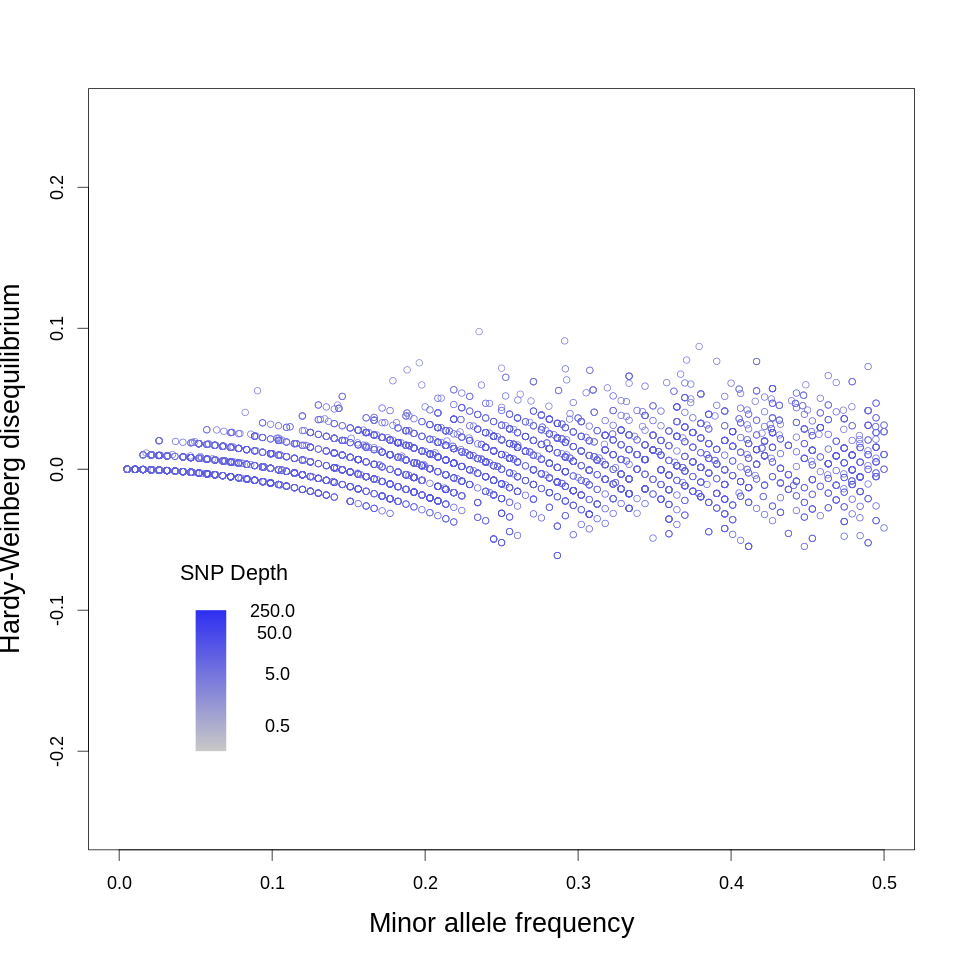

In [43]:
from IPython import display
display.Image("./finplot.png")

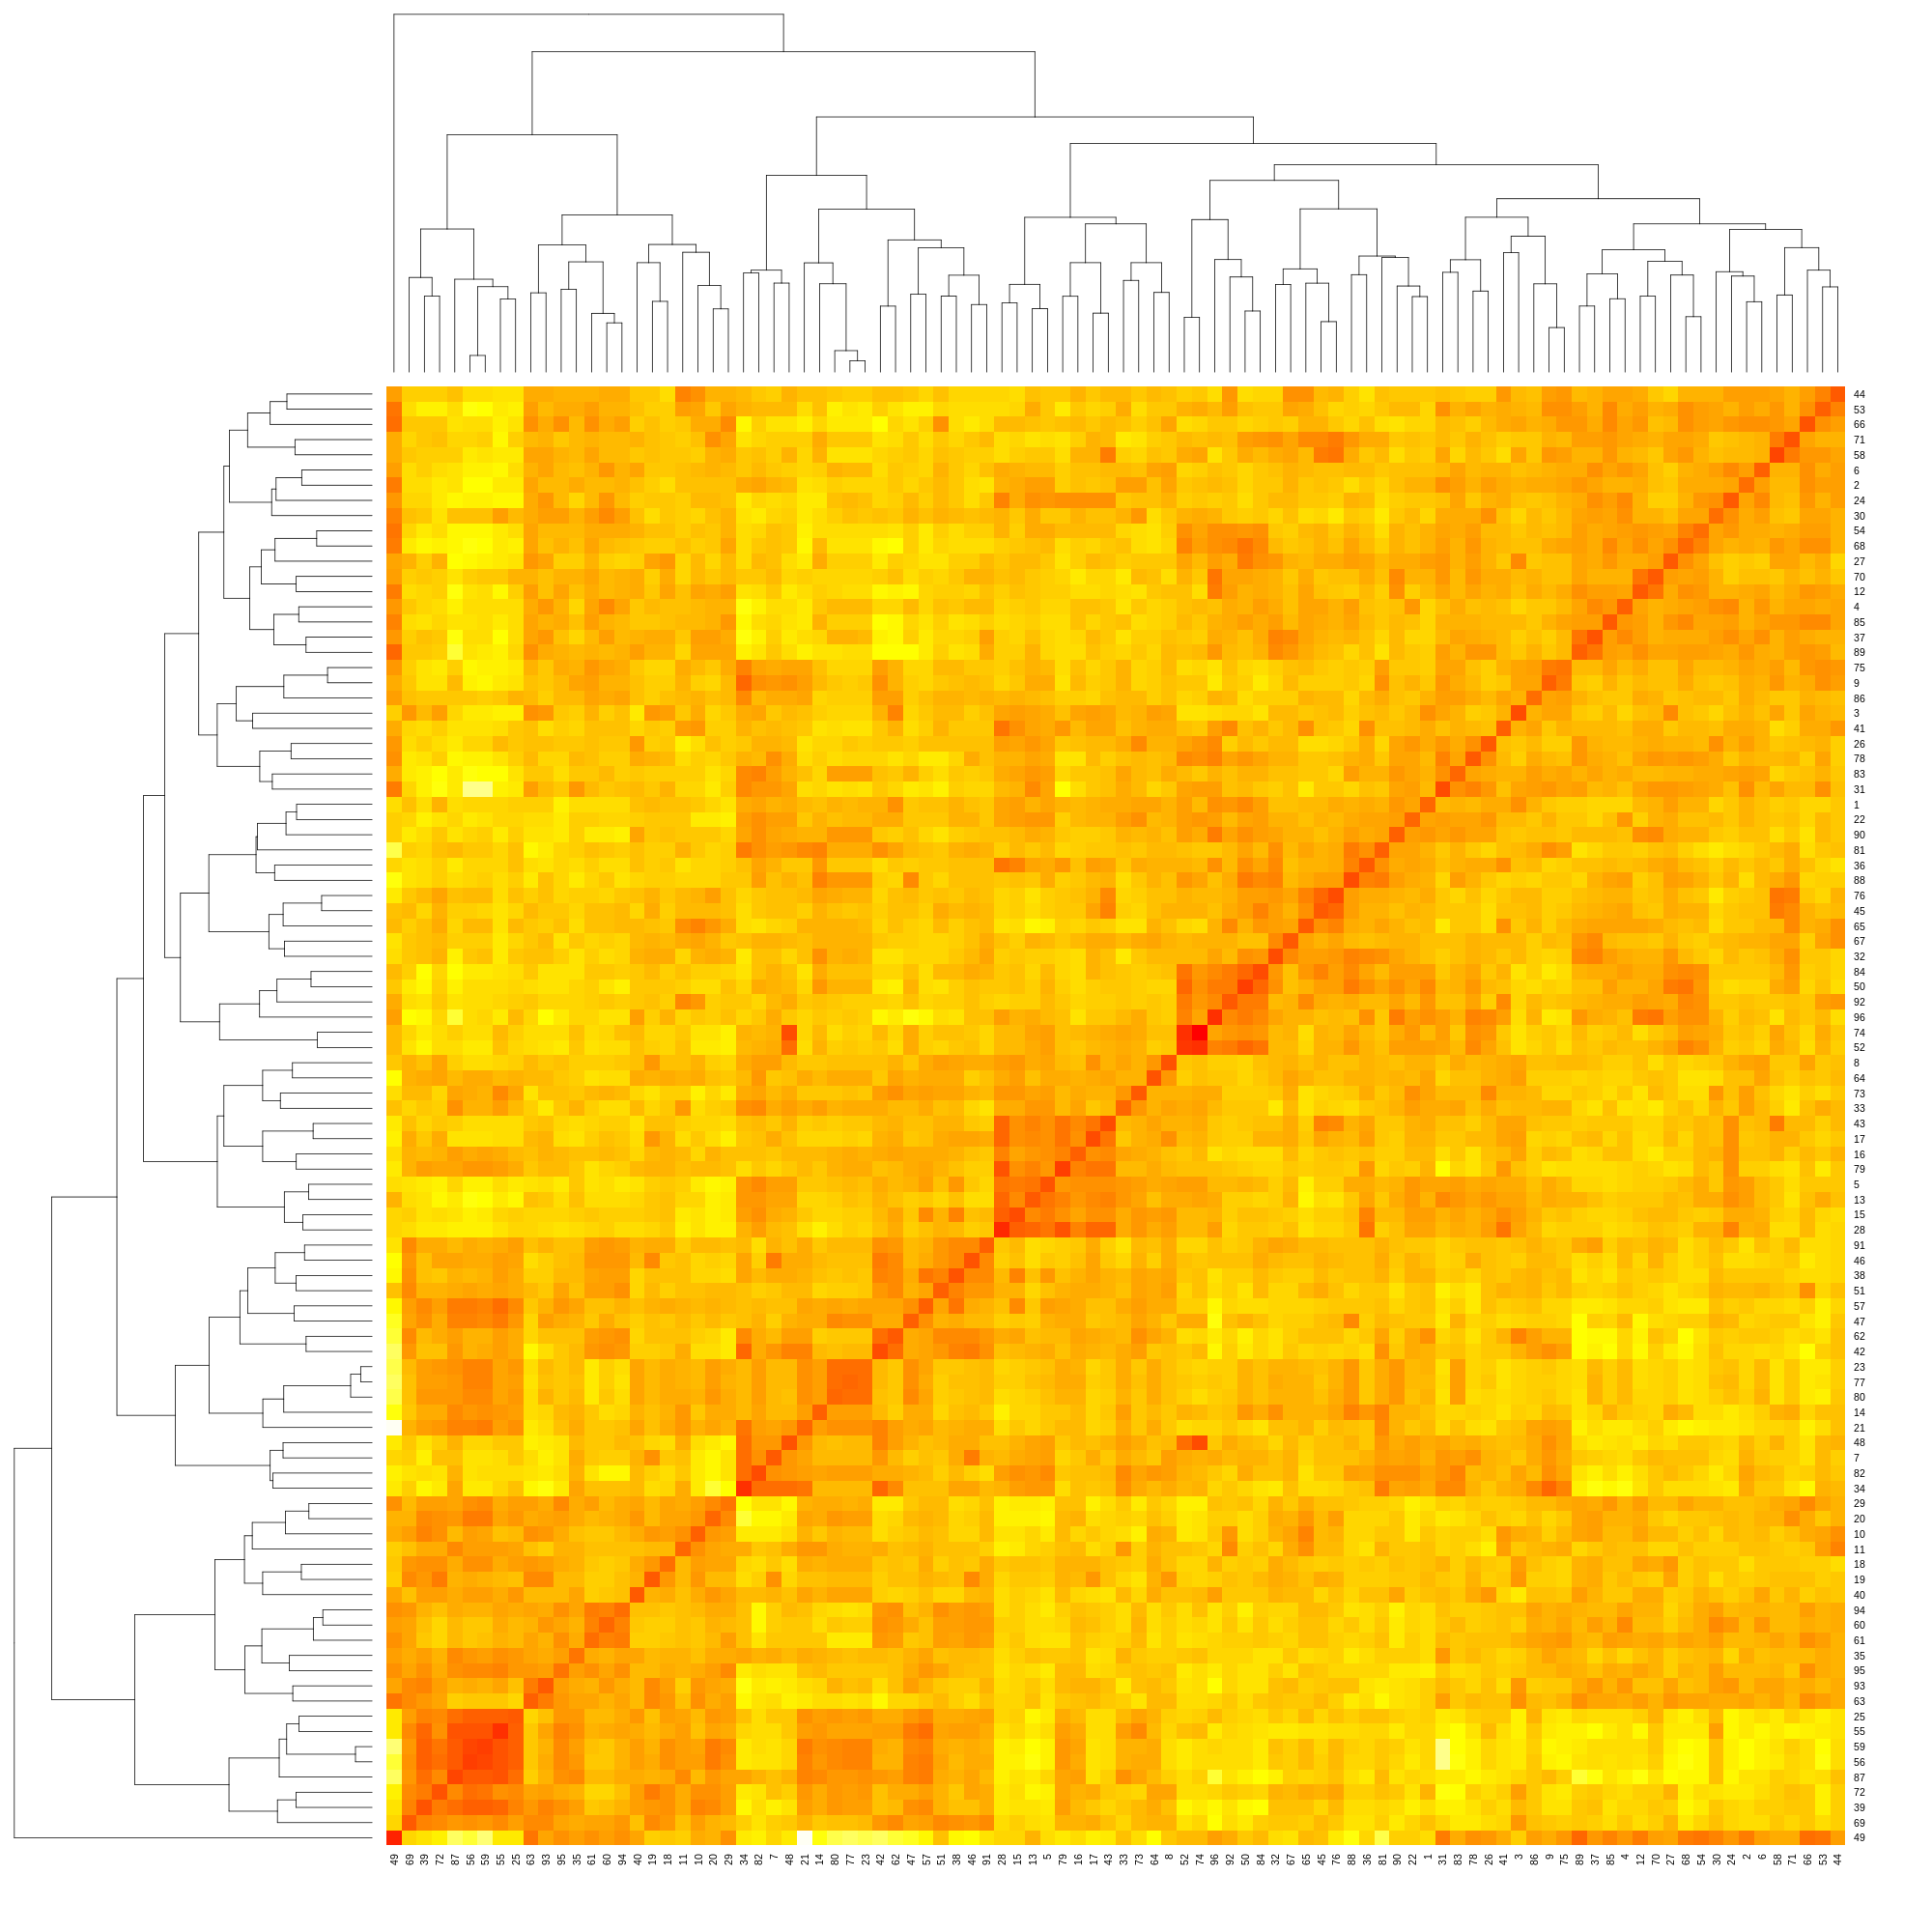

In [ ]:
from IPython import display
display.Image("./Heatmap-G5HWdgm.05.png")